#### Principal Component Analysis

Principal Component Analysis one of a variety of methods for dimensional reduction:

Dimensional reduction transforms the data to a lower dimension

* Given features, $𝑋_1,\dots,𝑋_𝑚$  we would require ${m \choose 2}=\frac{𝑚 \cdot (𝑚−1)}{2}$ scatter plots to visualize just the two-dimensional scatter plots.

* Once we have 4 or more variables understanding our data gets very hard.

* Curse of dimensionality, impact inference, modeling and visualization. 

One solution, is to find a good lower dimensional, $𝑝$,  representation of the original dimensions $𝑚$

Benefits of Working in a Reduced Dimensional Representation:

1. Data storage / Computational Time

2. Easier visualization

3. Also takes care of multicollinearity 

#### Orthogonal Transformation 

Convert a set of observations into a set of linearly uncorrelated variables known as principal components

* The number of principal components ($k$) available are min⁡($𝑛−1,𝑚$) 

* Limited by the variables/features, $𝑚$, and the number of data

Components are ordered

* First component describes the larges possible variance / accounts for as much variability as possible
* Next component describes the largest possible remaining variance 
* Up to the maximum number of principal components

Eigen Values / Eigen Vectors

* The Eigen values are the variance explained for each component. 
* The Eigen vectors of the data covariance matrix are the principal components and the Eigen  



### Objectives

In this workflow, we will explore 4 basic aspects of PCA. These include:

  - Orthogonal rotation and the incorporation of eigen math [TODO]

  - Forward and backward transformations

  - Variance Explained

  - Dimensionality Reduction

PCA allows is to find good relationships within lower dimensions to allow for greater representation of a multivariate data set and has benefits including ease of visualization, multicollinearity and a reduction in data storage and computational analysis.

It is hoped that this interactive version of PCA will provide greater understanding with regards to the benefit of the method in general application.

## Import Packages

In [74]:
import os                                                 # to set current working directory 
from sklearn.decomposition import PCA                     # PCA program from scikit learn (package for machine learning)
from sklearn.preprocessing import StandardScaler          # standardize variables to mean of 0.0 and variance of 1.0
import pandas as pd                                       # DataFrames and plotting
import pandas.plotting as pd_plot                         # matrix scatter plots
import numpy as np                                        # arrays and matrix math
import matplotlib.pyplot as plt                           # plotting
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interactive, interact              # widgets and interactivity
from ipywidgets import widgets                            
from ipywidgets import Layout
from ipywidgets import Label
import matplotlib.transforms as transforms
import math
from ipywidgets import VBox, HBox
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
cmap = plt.cm.inferno
sns.set_context('poster')

## Available Dataset

-  XAS Dataset 1: Cu, Cu+, Cu2+

To add other Datasets
-  XAS Dataset 2: Ti compositions
-  XAS Dataset 3: Au Datasets from Larch
-  Generic Dataset: 
 


## DataSet-1: Cu, Cu+, Cu2+

In [ ]:
!wget https://raw.githubusercontent.com/pkrouth/XAFS2023/main/data/pca/Cu_mixture.dat?token=GHSAT0AAAAAACIW3KGFCV7TDABDGW4KLKWEZJO3USA
!wget https://raw.githubusercontent.com/pkrouth/XAFS2023/main/data/pca/Xanes_Energy.dat?token=GHSAT0AAAAAACIW3KGFNWH7G7UC44463OXWZJO3U5Q
!wget https://raw.githubusercontent.com/pkrouth/XAFS2023/main/data/pca/marked.nor?token=GHSAT0AAAAAACIW3KGF74WPXQTMOECI6QHIZJO3VGA
!wget https://raw.githubusercontent.com/pkrouth/XAFS2023/main/data/pca/true_mixtures.dat?token=GHSAT0AAAAAACIW3KGFC7MFQYT6XOFTSGJQZJO3VPQ

### Cu XANES of Standard Samples

In [52]:
from xafs_toolkit.utils.read import *
import matplotlib.pyplot as plt

In [53]:
df = load_df("./marked.nor")

# XDI/1.0 Demeter/0.9.26
# Demeter.output_filetype: multicolumn normalized mu(E)
# Element.symbol: Cu
# Element.edge: K
# Column.1: energy eV
# Column.2: cufoil_abs
# Column.3: cu2o_abs
# Column.4: cuo_abs
#------------------------
#  energy  cufoil_abs  cu2o_abs  cuo_abs
8770.2000       0.11878081E-02  -0.49623885E-02   0.11766116E-01
10


In [89]:
df.columns = ['energy', 'Cu_Foil', 'Cu2O', 'CuO']
df

,energy,Cu_Foil,Cu2O,CuO
0,8770.200,0.001188,-0.004962,0.011766
1,8780.206,0.001370,-0.003523,0.011046
2,8790.209,0.001142,-0.002593,0.009990
3,8800.208,0.000588,-0.001384,0.010790
4,8810.205,0.000648,-0.001179,0.005404
...,...,...,...,...
514,9762.226,1.008806,1.007273,1.005099
515,9764.207,1.008914,1.007306,1.005014
516,9766.222,1.008838,1.007321,1.004578
517,9768.204,1.009337,1.007478,1.005028


In [90]:
E0=8980

(8960.0, 9060.0)

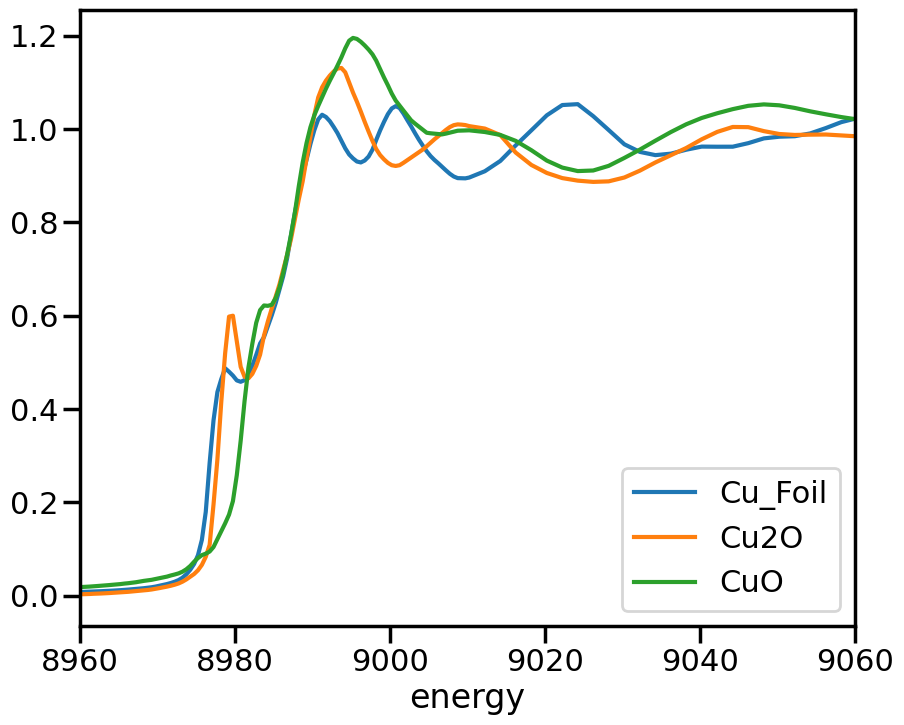

In [93]:
fig, ax = plt.subplots(figsize=(10,8))
df.plot(x='energy', y=df.columns[1:], ax=ax)
ax.set_xlim(E0-20, E0+80)

### Cu XANES of mixtures

In [177]:
Cu_mix = np.loadtxt('./Cu_mixture.dat')
Cu_energy = np.loadtxt('./Xanes_Energy.dat')
E0=8980

In [178]:
Cu_mix.shape

(519, 10)

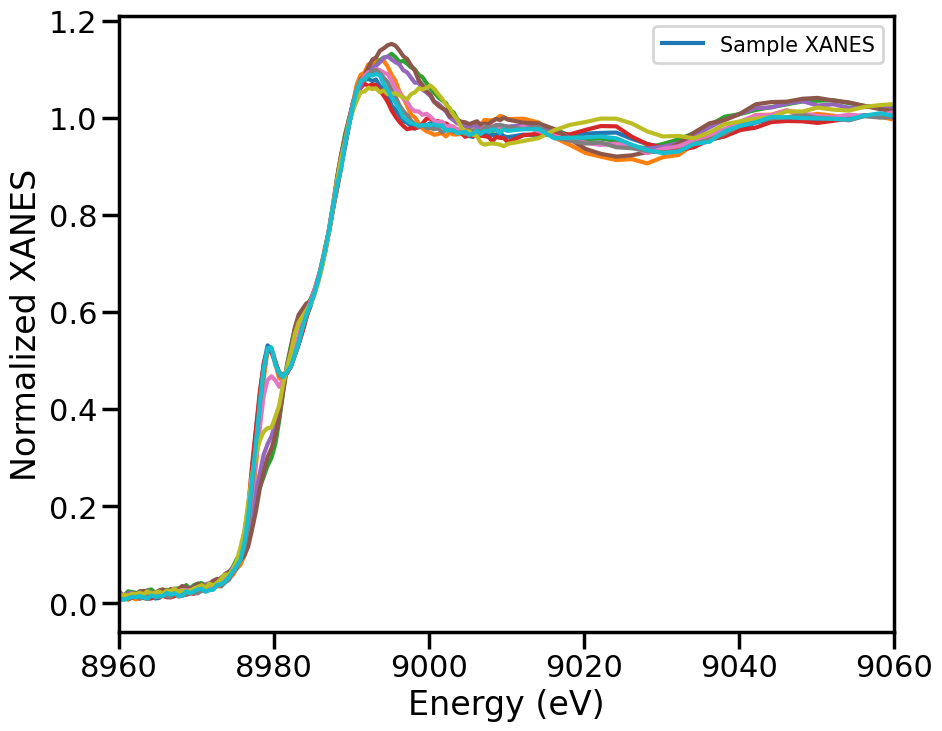

In [179]:
fig, ax = plt.subplots(figsize=(10,8))
for i in range(Cu_mix.shape[1]):
    ax.plot(Cu_energy, Cu_mix[:,i])
ax.set_xlim(E0-20, E0+80)
ax.set_xlabel('Energy (eV)', )#fontsize=10)
ax.set_ylabel('Normalized XANES',)# fontsize=10)
ax.legend(['Sample XANES' ], fontsize=15)

### Principal Components: Fit and Transform

In [180]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
X = Cu_mix[36:164, :]
# scaler = MinMaxScaler()
scaler = StandardScaler()
X_norm = scaler.fit_transform(X=X)

In [182]:
pca = PCA()
pca.fit(X_norm.T)
pca.explained_variance_ratio_

array([8.27846115e-01, 1.62278077e-01, 2.09293291e-03, 1.78198853e-03,
       1.64534138e-03, 1.23453721e-03, 1.17641183e-03, 1.09322341e-03,
       8.51372116e-04, 2.48030440e-30])

### PCA: Scree Plot

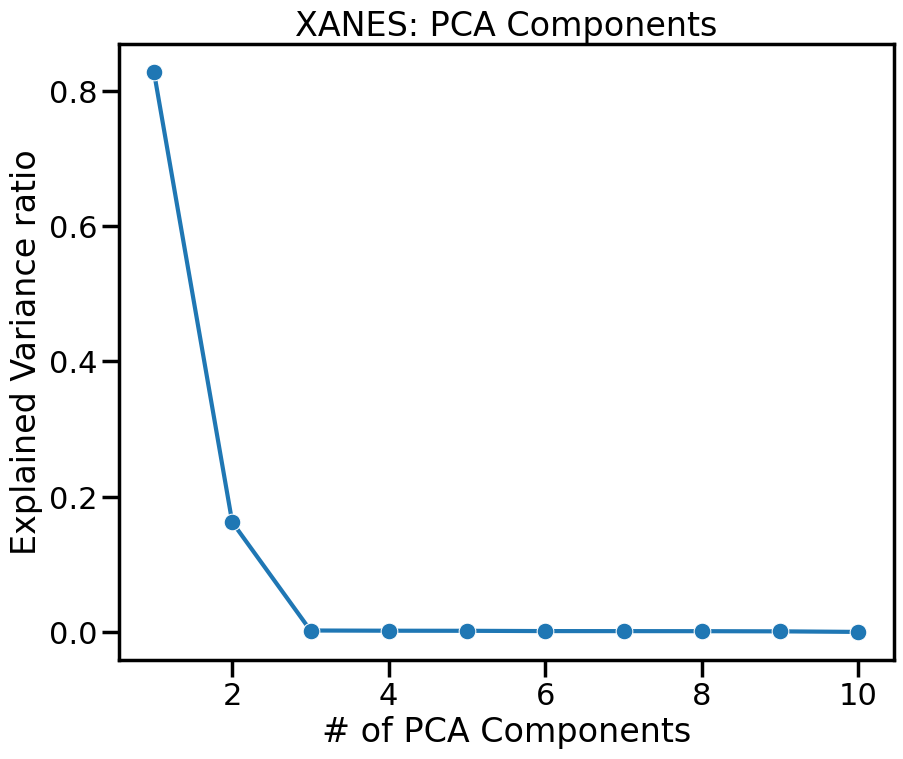

In [183]:
fig,ax = plt.subplots(figsize=(10,8))
ax = sns.lineplot(x= list(range(1,11)), y=pca.explained_variance_ratio_, marker='o', ax=ax)
_ = ax.axes.set_xlabel("# of PCA Components")
_ = ax.axes.set_ylabel("Explained Variance ratio")
_ = ax.axes.set_title("XANES: PCA Components")

### PCA Projection

In [198]:

standards = df.iloc[36:164, 1:]
# standards_norm = scaler_standards.fit_transform(standards)

pca_XANES_data = pd.DataFrame(pca.transform(X.T), columns=[f'pca_{i}' for i in range(10)])

In [199]:
pca_XANES_data

,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9
0,-0.169045,0.059619,-0.877016,-1.186621,-0.622311,-0.249183,-0.320521,0.072491,-0.471146,-1.882662
1,-0.072148,-0.171322,-0.875022,-1.150680,-0.604078,-0.273482,-0.316566,0.061563,-0.469103,-1.873514
2,0.456080,0.032549,-0.853905,-1.156449,-0.574360,-0.258535,-0.306889,0.058069,-0.449911,-1.866252
3,-0.172921,0.115613,-0.875502,-1.194793,-0.620989,-0.288241,-0.310606,0.072837,-0.466338,-1.883215
4,0.344007,-0.010276,-0.834806,-1.138910,-0.591705,-0.259358,-0.288712,0.075626,-0.464850,-1.869239
5,0.446090,-0.090811,-0.857668,-1.134041,-0.606358,-0.259139,-0.300374,0.078605,-0.439010,-1.863098
6,0.022223,-0.026974,-0.847308,-1.154892,-0.597188,-0.264467,-0.314653,0.069519,-0.445684,-1.877882
7,-0.126054,-0.046509,-0.882488,-1.172550,-0.608488,-0.260801,-0.289333,0.058979,-0.456322,-1.877850
8,0.205738,0.244323,-0.878916,-1.142672,-0.605333,-0.265623,-0.308064,0.065447,-0.459688,-1.879215
9,-0.140391,0.005801,-0.891160,-1.173090,-0.590173,-0.267011,-0.308940,0.087970,-0.463525,-1.880225


In [203]:

pca_standards = pd.DataFrame(pca.transform(standards.T), columns=[f'pca_{i}' for i in range(10)])

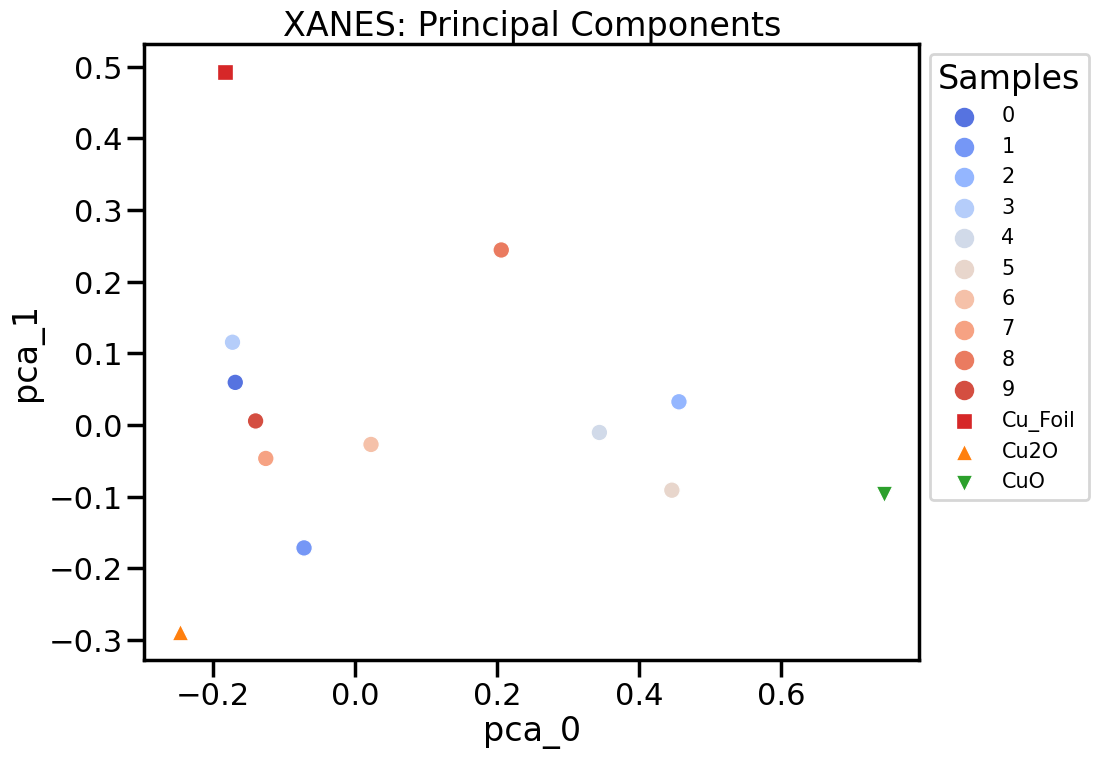

In [205]:
fig, ax = plt.subplots(figsize=(10,8))
_ = sns.scatterplot(x='pca_0',y='pca_1', data=pca_XANES_data, hue=pca_XANES_data.index, palette=sns.color_palette("coolwarm", 10), ax=ax)
_ = sns.scatterplot(x='pca_0',y='pca_1', data=pca_standards.iloc[0,:].to_frame().transpose(), marker='s', ax=ax, label='Cu_Foil', color='tab:red')
_ = sns.scatterplot(x='pca_0',y='pca_1', data=pca_standards.iloc[1,:].to_frame().transpose(), marker='^', ax=ax, label='Cu2O')
_ = sns.scatterplot(x='pca_0',y='pca_1', data=pca_standards.iloc[2,:].to_frame().T, marker='v', ax=ax, label='CuO')
_ = plt.legend(fontsize=15, bbox_to_anchor=(1, 1.), loc='upper left', title='Samples', ncol=1)
_ = ax.axes.set_title("XANES: Principal Components")

_ = plt.show()

In [188]:
loading = np.loadtxt('./true_mixtures.dat')
loading

array([[4.36665990e-01, 1.12791197e-01, 2.42209580e-01, 5.10358122e-01,
        2.13413162e-01, 8.92438137e-02, 2.76264281e-01, 2.82673644e-01,
        5.80889615e-01, 3.53364425e-01],
       [5.13299477e-01, 7.19497847e-01, 6.51699801e-02, 4.43911087e-01,
        2.06005472e-01, 2.17880640e-01, 4.70784388e-01, 6.09392886e-01,
        3.34726163e-05, 5.59208724e-01],
       [5.00345328e-02, 1.67710956e-01, 6.92620440e-01, 4.57307912e-02,
        5.80581366e-01, 6.92875546e-01, 2.52951332e-01, 1.07933470e-01,
        4.19076913e-01, 8.74268514e-02]])

In [ ]:
## Show PCA transformation == Rotation via animation from manim